In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd

In [2]:
import xlrd

In [3]:
data = pd.read_excel('updated_english.xlsx')

In [4]:
data.tail()

,Unnamed: 0,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,...,satkhira,madaripur,chittagong,kushtia,jessore,bandarban,affected,dhaka,cmh,university
1145,1145,yogeshwarareddy,664064000,Shanta biotech first time brought hepatitis va...,/yogeshwarareddy/status/1172145791772708864,0,0,0,2019-09-12 06:51:48,False,...,0,0,0,0,0,0,0,0,0,0
1146,1146,HealthF11672041,1725390848,Foods Help to Increase Platelets Count -,/HealthF11672041/status/1172149336182054912,0,0,0,2019-09-12 07:05:53,False,...,0,0,0,0,0,0,0,0,0,0
1147,1147,senjutisaha,1758781442,2 months ago I tweeted about the previous 2 mo...,/senjutisaha/status/1172184391738515458,0,6,1,2019-09-12 09:25:11,False,...,0,0,0,0,0,0,0,0,0,0
1148,1148,GHTCoalition,-1084776448,As a result of the #dengue outbreak sweeping ...,/GHTCoalition/status/1172200701180747776,2,6,0,2019-09-12 10:30:00,False,...,0,0,0,0,0,0,0,0,0,0
1149,1149,truthlabindia,1427439616,# Dengue can be eliminated by infecting the m...,/truthlabindia/status/1172248459434328064,0,0,0,2019-09-12 13:39:46,False,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.drop(list(data.columns)[0],axis=1,inplace=True)

In [6]:
data

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,...,satkhira,madaripur,chittagong,kushtia,jessore,bandarban,affected,dhaka,cmh,university
0,DOAWAYWDENGUE,-1807863340,# DENGUEFEVER #AWARENESS - `Dengue may break...,/DOAWAYWDENGUE/status/19666973140,0,0,0,2010-07-27 08:54:07,False,false,...,0,0,0,0,0,0,0,1,0,0
1,Crof,574763009,Bangladesh : 473 #dengue cases in Dhaka,/Crof/status/102929918320586753,0,0,0,2011-08-14 19:29:39,False,false,...,0,0,0,0,0,0,0,0,0,0
2,DengueNews,-268296192,# Dengue News: Eradicating dengue menace - Fi...,/DengueNews/status/110057252496482304,0,0,0,2011-09-03 11:31:08,False,false,...,0,0,0,0,0,0,0,1,0,0
3,Mazedul,-71159808,"Urgent O- ( O Negative) Blood Needed \n""O-"" ...",/Mazedul/status/137597059736940544,0,0,0,2011-11-18 10:24:30,False,false,...,0,0,0,0,0,0,0,1,0,0
4,DengueNews,1484926976,# Dengue News: Dengue-like fever returns stro...,/DengueNews/status/139426347993935872,0,0,0,2011-11-23 11:33:26,False,false,...,0,0,0,0,0,0,0,1,0,0
5,DengueNews,-1891483647,# Dengue News: Hydroclimatological variabilit...,/DengueNews/status/194786278334676993,0,0,0,2012-04-24 06:54:02,False,false,...,0,0,0,0,0,0,0,0,0,0
6,OnlyinDhaka,-1048444928,"Ah, the smell of #Dhaka 's open #sewerage in ...",/OnlyinDhaka/status/268289421768523776,0,0,0,2012-11-13 01:49:17,False,false,...,0,0,0,0,0,0,0,0,0,0
7,selimbd08,1170362368,"O+ Blood Needed, Loc- Lab-Aid Hospital, Dhan...",/selimbd08/status/271294269006958592,0,0,0,2012-11-21 08:49:28,False,false,...,0,0,0,0,0,0,0,0,0,0
8,IDRC_CRDI,549613568,« Notre recherche permettra d’établir des donn...,/IDRC_CRDI/status/291987055746117632,0,0,0,2013-01-17 11:15:13,False,false,...,0,0,0,0,0,0,0,0,0,0
9,IDRC_CRDI,557977600,« Que savons-nous de la #dengue à Dhaka ? T...,/IDRC_CRDI/status/292023550091595776,1,0,0,2013-01-17 13:40:14,False,false,...,0,0,0,0,0,0,0,0,0,0


In [7]:
optimal_topics = [(0,
  '0.250*"twitt" + 0.234*"pic" + 0.039*"awareness" + 0.022*"continue" + '
  '0.018*"support" + 0.016*"clean" + 0.016*"service" + 0.015*"malaria" + '
  '0.013*"volunteer" + 0.012*"raise"'),
 (1,
  '0.242*"dhaka" + 0.085*"mosquitoe" + 0.063*"city" + 0.038*"chikungunya" + '
  '0.029*"risk" + 0.022*"research" + 0.013*"rain" + 0.013*"burden" + '
  '0.011*"level" + 0.011*"water"'),
 (2,
  '0.185*"dhaka" + 0.062*"blood" + 0.041*"contact" + 0.027*"suffer" + '
  '0.026*"south" + 0.026*"blood_needed" + 0.024*"bag" + 0.024*"urgent" + '
  '0.019*"platelet" + 0.018*"facebook"'),
 (3,
  '0.254*"fever" + 0.166*"health" + 0.083*"www" + 0.032*"department" + '
  '0.027*"pic" + 0.025*"confirm" + 0.017*"twitter" + 0.014*"majority" + '
  '0.013*"confirmed_html" + 0.013*"call"'),
 (4,
  '0.133*"disease" + 0.105*"dengue" + 0.071*"spread" + 0.063*"mosquito_borne" '
  '+ 0.037*"infection" + 0.026*"district" + 0.025*"virus" + 0.022*"world" + '
  '0.020*"viral" + 0.017*"protect"'),
 (5,
  '0.247*"dengue" + 0.096*"epidemic" + 0.028*"order" + 0.023*"due" + '
  '0.020*"doh" + 0.020*"reach" + 0.019*"hello_professional" + '
  '0.019*"children_book" + 0.019*"gig" + 0.019*"please_check"'),
 (6,
  '0.503*"dengue" + 0.025*"time" + 0.018*"stop" + 0.011*"set" + '
  '0.010*"shar_es" + 0.010*"girl" + 0.007*"eidulazha" + 0.007*"transmission" + '
  '0.007*"simple" + 0.007*"urge"'),
 (7,
  '0.282*"dengue" + 0.054*"day" + 0.040*"doctor" + 0.037*"symptom" + '
  '0.034*"prevention" + 0.028*"life" + 0.020*"severe" + 0.018*"make" + '
  '0.014*"eid" + 0.013*"bone"'),
 (8,
  '0.280*"bangladesh" + 0.156*"dengue" + 0.063*"denguefever" + 0.049*"rise" + '
  '0.029*"capital" + 0.018*"hospitalize" + 0.013*"menace" + '
  '0.010*"sheikhhasina" + 0.010*"colleague" + 0.010*"population"'),
 (9,
  '0.172*"news" + 0.157*"bangladesh" + 0.116*"hour" + 0.095*"dengue" + '
  '0.041*"hospitalise" + 0.039*"threat" + 0.029*"find" + 0.025*"multi_organ" + '
  '0.018*"hrs" + 0.017*"dead"'),
 (10,
  '0.222*"dengue" + 0.123*"bangladesh" + 0.067*"http" + 0.037*"minister" + '
  '0.037*"official" + 0.021*"article" + 0.021*"claim" + 0.018*"home" + '
  '0.013*"ward" + 0.012*"twitt"'),
 (11,
  '0.241*"hospital" + 0.191*"patient" + 0.063*"number" + 0.034*"admit" + '
  '0.023*"total" + 0.022*"mirpur" + 0.019*"emergency" + 0.016*"friday" + '
  '0.013*"place" + 0.013*"give"'),
 (12,
  '0.185*"mosquito" + 0.058*"aede" + 0.058*"control" + 0.035*"fight" + '
  '0.026*"city_corporation" + 0.026*"prevent" + 0.019*"mayor" + 0.019*"area" + '
  '0.018*"technique" + 0.018*"effective"'),
 (13,
  '0.235*"outbreak" + 0.161*"bangladesh" + 0.070*"bad" + 0.043*"diagnose" + '
  '0.029*"struggle" + 0.029*"record" + 0.023*"hit" + 0.018*"worst_ever" + '
  '0.017*"face" + 0.015*"overwhelm"'),
 (14,
  '0.358*"dengue" + 0.032*"increase" + 0.021*"test" + 0.017*"stay" + '
  '0.016*"safe" + 0.013*"caso" + 0.012*"count" + 0.012*"status" + 0.011*"good" '
  '+ 0.011*"team"'),
 (15,
  '0.144*"die" + 0.078*"https" + 0.062*"thedailystar_net" + 0.060*"fever" + '
  '0.054*"country" + 0.039*"medical_college" + 0.035*"treatment" + 0.034*"www" '
  '+ 0.029*"khulna" + 0.027*"include"'),
 (16,
  '0.159*"people" + 0.117*"bangladesh" + 0.069*"country" + 0.038*"govt" + '
  '0.037*"child" + 0.035*"infect" + 0.024*"read" + 0.023*"tackle" + '
  '0.023*"work" + 0.021*"situation"'),
 (17,
  '0.190*"case" + 0.144*"year" + 0.085*"report" + 0.067*"death" + '
  '0.034*"deadly" + 0.034*"high" + 0.027*"record" + 0.022*"dgh" + '
  '0.018*"month" + 0.018*"july"'),
 (18,
  '0.233*"https" + 0.162*"bangladesh" + 0.064*"www" + 0.039*"dengueoutbreak" + '
  '0.025*"bit_ly" + 0.020*"dhakatribune" + 0.016*"toll" + 0.012*"politic" + '
  '0.011*"het" + 0.011*"bf"'),
 (19,
  '0.135*"health" + 0.036*"healthcare" + 0.035*"medical" + 0.035*"government" '
  '+ 0.030*"family" + 0.023*"issue" + 0.020*"vaccine" + 0.020*"accord" + '
  '0.017*"net" + 0.017*"crisis"')]

In [8]:
new_topics = [row[1] for row in optimal_topics]

In [9]:
topic_with_score = [new_topics[i].split('+') for i in range(len(new_topics))]

In [10]:
[topic_with_score[i][j].split('*')[0] for i in range(len(topic_with_score))  for j in range(len(topic_with_score[i]))]

['0.250',
 ' 0.234',
 ' 0.039',
 ' 0.022',
 ' 0.018',
 ' 0.016',
 ' 0.016',
 ' 0.015',
 ' 0.013',
 ' 0.012',
 '0.242',
 ' 0.085',
 ' 0.063',
 ' 0.038',
 ' 0.029',
 ' 0.022',
 ' 0.013',
 ' 0.013',
 ' 0.011',
 ' 0.011',
 '0.185',
 ' 0.062',
 ' 0.041',
 ' 0.027',
 ' 0.026',
 ' 0.026',
 ' 0.024',
 ' 0.024',
 ' 0.019',
 ' 0.018',
 '0.254',
 ' 0.166',
 ' 0.083',
 ' 0.032',
 ' 0.027',
 ' 0.025',
 ' 0.017',
 ' 0.014',
 ' 0.013',
 ' 0.013',
 '0.133',
 ' 0.105',
 ' 0.071',
 ' 0.063',
 ' 0.037',
 ' 0.026',
 ' 0.025',
 ' 0.022',
 ' 0.020',
 ' 0.017',
 '0.247',
 ' 0.096',
 ' 0.028',
 ' 0.023',
 ' 0.020',
 ' 0.020',
 ' 0.019',
 ' 0.019',
 ' 0.019',
 ' 0.019',
 '0.503',
 ' 0.025',
 ' 0.018',
 ' 0.011',
 ' 0.010',
 ' 0.010',
 ' 0.007',
 ' 0.007',
 ' 0.007',
 ' 0.007',
 '0.282',
 ' 0.054',
 ' 0.040',
 ' 0.037',
 ' 0.034',
 ' 0.028',
 ' 0.020',
 ' 0.018',
 ' 0.014',
 ' 0.013',
 '0.280',
 ' 0.156',
 ' 0.063',
 ' 0.049',
 ' 0.029',
 ' 0.018',
 ' 0.013',
 ' 0.010',
 ' 0.010',
 ' 0.010',
 '0.172',
 ' 0.157'

In [11]:
temp_lst = []
temp_lst_temp = []
for i in range(len(topic_with_score)):
    for j in range(len(topic_with_score[i])):
        
        temp_lst_temp.append(topic_with_score[i][j].split('*')[0])
    temp_lst.append(temp_lst_temp)
    temp_lst_temp = []

In [12]:
scores = temp_lst

In [13]:
temp_lst = []
temp_lst_temp = []
for i in range(len(topic_with_score)):
    for j in range(len(topic_with_score[i])):
        
        temp_lst_temp.append(topic_with_score[i][j].split('*')[1])
    temp_lst.append(temp_lst_temp)
    temp_lst_temp = []

In [14]:
names = temp_lst

In [15]:
temp_lst = []
temp_lst_temp = []
for i in range(len(scores)):
    for j in range(len(scores[i])):
        
        temp_lst_temp.append(float(scores[i][j]))
    temp_lst.append(temp_lst_temp)
    temp_lst_temp = []

In [16]:
scores = temp_lst

In [17]:
scores

[[0.25, 0.234, 0.039, 0.022, 0.018, 0.016, 0.016, 0.015, 0.013, 0.012],
 [0.242, 0.085, 0.063, 0.038, 0.029, 0.022, 0.013, 0.013, 0.011, 0.011],
 [0.185, 0.062, 0.041, 0.027, 0.026, 0.026, 0.024, 0.024, 0.019, 0.018],
 [0.254, 0.166, 0.083, 0.032, 0.027, 0.025, 0.017, 0.014, 0.013, 0.013],
 [0.133, 0.105, 0.071, 0.063, 0.037, 0.026, 0.025, 0.022, 0.02, 0.017],
 [0.247, 0.096, 0.028, 0.023, 0.02, 0.02, 0.019, 0.019, 0.019, 0.019],
 [0.503, 0.025, 0.018, 0.011, 0.01, 0.01, 0.007, 0.007, 0.007, 0.007],
 [0.282, 0.054, 0.04, 0.037, 0.034, 0.028, 0.02, 0.018, 0.014, 0.013],
 [0.28, 0.156, 0.063, 0.049, 0.029, 0.018, 0.013, 0.01, 0.01, 0.01],
 [0.172, 0.157, 0.116, 0.095, 0.041, 0.039, 0.029, 0.025, 0.018, 0.017],
 [0.222, 0.123, 0.067, 0.037, 0.037, 0.021, 0.021, 0.018, 0.013, 0.012],
 [0.241, 0.191, 0.063, 0.034, 0.023, 0.022, 0.019, 0.016, 0.013, 0.013],
 [0.185, 0.058, 0.058, 0.035, 0.026, 0.026, 0.019, 0.019, 0.018, 0.018],
 [0.235, 0.161, 0.07, 0.043, 0.029, 0.029, 0.023, 0.018, 0.017,

In [18]:
sum([sum(scores[i])/len(scores[i]) for i in range(len(scores))])/len([sum(scores[i])/len(scores[i]) for i in range(len(scores))])

0.05649

In [19]:
temp_lst = []
temp_lst_temp = []
for i in range(len(names)):
    for j in range(len(names[i])):
        names[i][j] = names[i][j].replace('\"' , '')
        names[i][j] = names[i][j].replace(' ','')
        temp_lst_temp.append(names[i][j])
    temp_lst.append(temp_lst_temp)
    temp_lst_temp = []

In [20]:
names = temp_lst

In [21]:
lemmatized = data['data_lemmatized']

In [65]:
temp_lst = []

for i in range(len(lemmatized)):
    for j in range(len(names)):
        temp_var = 0
        for k in range(len(names[j])):
            if names[j][k] in lemmatized[i]:
                temp_var += scores[j][k]
                #print('haha')
            if temp_var > 0.3:
                temp_lst_temp.append(j)
                break
    temp_lst.append(temp_lst_temp)
    temp_lst_temp = []


In [66]:
list_of_topics = temp_lst.copy()

In [67]:
list_of_topics

[[1, 6, 14],
 [2, 6, 11, 14],
 [1, 6, 8, 10, 14],
 [1],
 [1, 6, 14],
 [6, 14],
 [6, 8, 10, 14],
 [6, 8, 10, 14],
 [0, 6, 10, 14],
 [6, 14],
 [6, 8, 10, 14, 17],
 [6, 8, 10, 14, 17],
 [6, 14],
 [],
 [1, 6, 14],
 [6, 11, 14],
 [6, 11, 14],
 [6, 8, 10, 14],
 [6, 11, 14],
 [6, 11, 14],
 [6, 14],
 [6, 14],
 [6, 14],
 [6, 14],
 [6, 7, 14],
 [6, 7, 8, 10, 14, 16],
 [6, 14],
 [6, 8, 10, 14],
 [6, 14],
 [6, 14],
 [6, 8, 10, 14],
 [6, 14],
 [2, 6, 14],
 [6, 8, 10, 14],
 [6, 8, 10, 14],
 [6, 14],
 [6, 14],
 [6, 8, 10, 14],
 [6, 8, 9, 10, 14, 18],
 [2, 6, 14],
 [2, 6, 11, 14],
 [6, 8, 10, 14],
 [6, 8, 10, 14, 17, 18],
 [6, 7, 8, 10, 14],
 [6, 8, 10, 14],
 [6, 7, 8, 9, 10, 13, 14, 17],
 [6, 8, 10, 14],
 [6, 8, 10, 14],
 [6, 8, 10, 14],
 [2, 6, 11, 14],
 [2, 6, 11, 14],
 [0, 6, 8, 10, 14, 18],
 [6, 11, 14],
 [1, 3, 6, 14],
 [6, 8, 10, 14],
 [6, 7, 14, 17],
 [3, 6, 8, 10, 14, 17, 18],
 [6, 14, 17],
 [6, 8, 10, 14, 17],
 [6, 14],
 [5, 6, 8, 10, 14, 17],
 [5, 6, 8, 10, 14, 17],
 [6, 8, 10, 14],
 [6, 8,

In [68]:
all_topics = [list_of_topics[i][j] for i in range(len(list_of_topics)) for j in range(len(list_of_topics[i]))]

In [69]:
def countFrequency(my_list): 
  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

        

freq_dict = countFrequency(all_topics)


for key, value in freq_dict.items(): 
        print ("% d : % d"%(key, value)) 

 1 :  62
 6 :  1089
 14 :  1089
 2 :  26
 11 :  93
 8 :  670
 10 :  726
 0 :  214
 17 :  51
 7 :  194
 16 :  56
 9 :  124
 18 :  166
 13 :  162
 3 :  119
 5 :  62
 4 :  43
 12 :  8
 15 :  32


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
import collections

In [72]:
freq_dict = collections.OrderedDict(sorted(freq_dict.items()))

In [73]:
freq_dict

OrderedDict([(0, 214),
             (1, 62),
             (2, 26),
             (3, 119),
             (4, 43),
             (5, 62),
             (6, 1089),
             (7, 194),
             (8, 670),
             (9, 124),
             (10, 726),
             (11, 93),
             (12, 8),
             (13, 162),
             (14, 1089),
             (15, 32),
             (16, 56),
             (17, 51),
             (18, 166)])

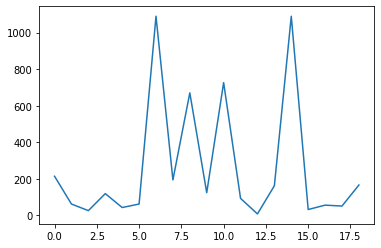

In [74]:
plt.plot(list(freq_dict.keys()),[freq_dict.get(i) for i in freq_dict.keys()])

In [75]:
data['topics'] = list_of_topics

In [76]:
t = data[['datetime' , 'topics']].copy()

In [78]:
dic = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : [],
    6 : [],
    7 : [],
    8 : [],
    9 : [],
    10 : [],
    11 : [],
    12 : [],
    13 : [],
    14 : [],
    15 : [],
    16 : [],
    17 : [],
    18 : [],
    
}


for i in range(len(list_of_topics)):
    for j in range(len(list_of_topics[i])):
        
        dic[list_of_topics[i][j]].append(i)

In [79]:
zero = [0 for i in range(len(data))]

In [80]:
for i in range(len(dic[0])):
    zero[dic[0][i]] = 1

In [81]:
one = [0 for i in range(len(data))]
two = [0 for i in range(len(data))]
three = [0 for i in range(len(data))]
four = [0 for i in range(len(data))]
five = [0 for i in range(len(data))]
six = [0 for i in range(len(data))]
seven = [0 for i in range(len(data))]
eight = [0 for i in range(len(data))]
nine = [0 for i in range(len(data))]
ten = [0 for i in range(len(data))]
eleven = [0 for i in range(len(data))]
twelve = [0 for i in range(len(data))]
thirteen = [0 for i in range(len(data))]
fourteen = [0 for i in range(len(data))]
fifteen = [0 for i in range(len(data))]
sixteen = [0 for i in range(len(data))]
seventeen = [0 for i in range(len(data))]
eighteen = [0 for i in range(len(data))]


In [82]:
for i in range(len(dic[1])):
    one[dic[1][i]] = 1

for i in range(len(dic[2])):
    two[dic[2][i]] = 1

for i in range(len(dic[3])):
    three[dic[3][i]] = 1

for i in range(len(dic[4])):
    four[dic[4][i]] = 1

for i in range(len(dic[5])):
    five[dic[5][i]] = 1

for i in range(len(dic[6])):
    six[dic[6][i]] = 1

for i in range(len(dic[7])):
    seven[dic[7][i]] = 1

for i in range(len(dic[8])):
    eight[dic[8][i]] = 1

for i in range(len(dic[9])):
    nine[dic[9][i]] = 1

for i in range(len(dic[10])):
    ten[dic[10][i]] = 1

for i in range(len(dic[11])):
    eleven[dic[11][i]] = 1

for i in range(len(dic[12])):
    twelve[dic[12][i]] = 1

for i in range(len(dic[13])):
    thirteen[dic[13][i]] = 1
    
for i in range(len(dic[14])):
    thirteen[dic[14][i]] = 1

for i in range(len(dic[15])):
    thirteen[dic[15][i]] = 1

for i in range(len(dic[16])):
    thirteen[dic[16][i]] = 1

for i in range(len(dic[17])):
    thirteen[dic[17][i]] = 1

for i in range(len(dic[18])):
    thirteen[dic[18][i]] = 1

In [83]:
data['zero'] = zero

data['one'] = one

data['two'] = two

data['three'] = three

data['four'] = four

data['five'] = five

data['six'] = six

data['seven'] = seven

data['eight'] = eight

data['nine'] = nine

data['ten'] = ten

data['eleven'] = eleven

data['twelve'] = twelve

data['thirteen'] = thirteen

data['fourteen'] = fourteen

data['fifteen'] = fifteen

data['sixteen'] = sixteen

data['seventeen'] = seventeen

data['eighteen'] = eighteen

In [85]:
import numpy as np

In [87]:
data.index = list(np.arange(0,len(data)))

In [88]:
string = [str(x) for x in data['datetime']]

In [89]:
string = [string[i].split(' ')[0] for i in range(len(string))]

In [90]:
year = [string[i].split('-')[0] for i in range(len(string))]

In [91]:
year = [int(year[i]) for i in range(len(year))]

In [92]:
data['year'] = year

In [94]:
grp_by = data.groupby('year').sum()

In [100]:
del grp_by.index.name

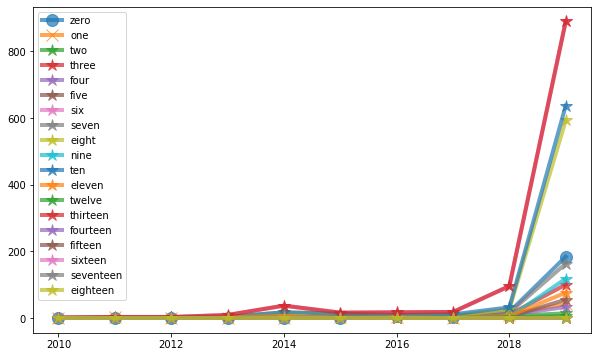

In [103]:
plt.figure(figsize=(10,6))
plt.plot(grp_by.index, grp_by['zero'] , marker='o', markersize=12, linewidth=4 , label='zero',alpha = 0.7)
plt.plot(grp_by.index, grp_by['one'] , marker='x',  markersize=12,  linewidth=4, label='one',alpha = 0.7)
plt.plot(grp_by.index, grp_by['two'] , marker='*',  markersize=12, linewidth=4, label='two',alpha = 0.7)
plt.plot(grp_by.index, grp_by['three'] , marker='*',  markersize=12, linewidth=4, label='three',alpha = 0.7)
plt.plot(grp_by.index, grp_by['four'] , marker='*',  markersize=12, linewidth=4, label='four',alpha = 0.7)
plt.plot(grp_by.index, grp_by['five'] , marker='*',  markersize=12, linewidth=4, label='five',alpha = 0.7)
plt.plot(grp_by.index, grp_by['six'] , marker='*',  markersize=12, linewidth=4, label='six',alpha = 0.7)
plt.plot(grp_by.index, grp_by['seven'] , marker='*',  markersize=12, linewidth=4, label='seven',alpha = 0.7)
plt.plot(grp_by.index, grp_by['eight'] , marker='*',  markersize=12, linewidth=4, label='eight',alpha = 0.7)
plt.plot(grp_by.index, grp_by['nine'] , marker='*',  markersize=12, linewidth=4, label='nine',alpha = 0.7)
plt.plot(grp_by.index, grp_by['ten'] , marker='*',  markersize=12, linewidth=4, label='ten',alpha = 0.7)
plt.plot(grp_by.index, grp_by['eleven'] , marker='*',  markersize=12, linewidth=4, label='eleven',alpha = 0.7)
plt.plot(grp_by.index, grp_by['twelve'] , marker='*',  markersize=12, linewidth=4, label='twelve',alpha = 0.7)
plt.plot(grp_by.index, grp_by['thirteen'] , marker='*',  markersize=12, linewidth=4, label='thirteen',alpha = 0.7)
plt.plot(grp_by.index, grp_by['fourteen'] , marker='*',  markersize=12, linewidth=4, label='fourteen',alpha = 0.7)
plt.plot(grp_by.index, grp_by['fifteen'] , marker='*',  markersize=12, linewidth=4, label='fifteen',alpha = 0.7)
plt.plot(grp_by.index, grp_by['sixteen'] , marker='*',  markersize=12, linewidth=4, label='sixteen',alpha = 0.7)
plt.plot(grp_by.index, grp_by['seventeen'] , marker='*',  markersize=12, linewidth=4, label='seventeen',alpha = 0.7)
plt.plot(grp_by.index, grp_by['eighteen'] , marker='*',  markersize=12, linewidth=4, label='eighteen',alpha = 0.7)




plt.legend()

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen
2010,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2011,0,3,1,0,0,0,3,0,1,0,1,1,0,3,0,0,0,0,0
2012,0,0,0,0,0,0,3,0,2,0,2,0,0,3,0,0,0,0,0
2013,1,1,0,0,0,0,9,0,3,0,4,2,0,9,0,0,0,0,0
2014,1,1,5,1,0,0,37,4,17,2,17,6,0,37,0,0,0,0,0
2015,1,2,0,2,0,3,16,1,13,0,13,0,0,16,0,0,0,0,0
2016,6,2,0,3,1,0,17,4,8,2,9,2,0,17,0,0,0,0,0
2017,3,0,0,3,0,0,18,6,7,0,11,0,0,18,0,0,0,0,0
2018,18,10,6,10,9,4,95,16,26,2,32,6,2,96,0,0,0,0,0
2019,184,42,14,100,33,55,890,163,593,118,637,76,6,890,0,0,0,0,0


In [112]:
string = [str(x) for x in data['datetime']]

In [113]:
string = [string[i].split(' ')[0] for i in range(len(string))]

In [114]:
two_thousand_nineteen = data[data['year'] == 2019].copy()

In [115]:
string = [str(x) for x in two_thousand_nineteen['datetime']]

In [116]:
string = [string[i].split(' ')[0] for i in range(len(string))]

In [117]:
month = [string[i].split('-')[1] for i in range(len(string))]

In [118]:
date = [string[i].split('-')[2] for i in range(len(string))]

In [119]:
two_thousand_nineteen = two_thousand_nineteen.copy()

In [120]:
two_thousand_nineteen['date'] = date

In [121]:
two_thousand_nineteen['month'] = month

In [122]:
two_thousand_nineteen['weeks'] = two_thousand_nineteen['datetime'].dt.week

In [127]:
grp_by_wks = two_thousand_nineteen.groupby('weeks').sum()

In [128]:
del grp_by_wks.index.name

In [129]:
grp_by_wks[grp_by_wks.columns[47:]]

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,year
6,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,2019
7,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,2019
12,1,1,0,0,0,1,2,1,2,0,2,0,0,2,0,0,0,0,0,4038
13,1,0,0,3,1,0,4,3,2,0,3,0,0,4,0,0,0,0,0,8076
14,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,2019
15,0,0,0,0,0,1,2,1,1,0,1,0,0,2,0,0,0,0,0,4038
17,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019
18,0,0,0,0,0,0,2,0,2,0,2,0,0,2,0,0,0,0,0,4038
19,0,0,0,0,0,2,4,0,3,0,3,0,0,4,0,0,0,0,0,8076
20,0,1,0,2,0,2,5,1,4,2,4,0,0,5,0,0,0,0,0,14133


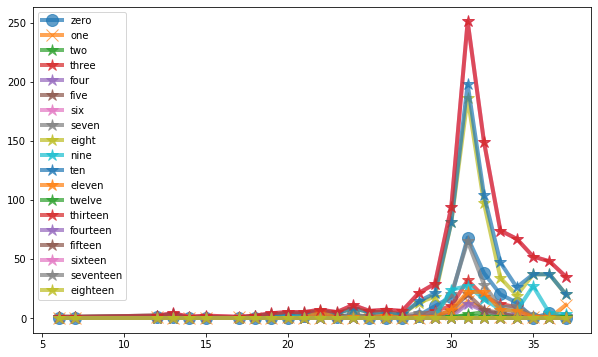

In [124]:
plt.figure(figsize=(10,6))
plt.plot(grp_by_wks.index, grp_by_wks['zero'] , marker='o', markersize=12, linewidth=4 , label='zero',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['one'] , marker='x',  markersize=12,  linewidth=4, label='one',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['two'] , marker='*',  markersize=12, linewidth=4, label='two',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['three'] , marker='*',  markersize=12, linewidth=4, label='three',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['four'] , marker='*',  markersize=12, linewidth=4, label='four',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['five'] , marker='*',  markersize=12, linewidth=4, label='five',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['six'] , marker='*',  markersize=12, linewidth=4, label='six',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['seven'] , marker='*',  markersize=12, linewidth=4, label='seven',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['eight'] , marker='*',  markersize=12, linewidth=4, label='eight',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['nine'] , marker='*',  markersize=12, linewidth=4, label='nine',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['ten'] , marker='*',  markersize=12, linewidth=4, label='ten',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['eleven'] , marker='*',  markersize=12, linewidth=4, label='eleven',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['twelve'] , marker='*',  markersize=12, linewidth=4, label='twelve',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['thirteen'] , marker='*',  markersize=12, linewidth=4, label='thirteen',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['fourteen'] , marker='*',  markersize=12, linewidth=4, label='fourteen',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['fifteen'] , marker='*',  markersize=12, linewidth=4, label='fifteen',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['sixteen'] , marker='*',  markersize=12, linewidth=4, label='sixteen',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['seventeen'] , marker='*',  markersize=12, linewidth=4, label='seventeen',alpha = 0.7)
plt.plot(grp_by_wks.index, grp_by_wks['eighteen'] , marker='*',  markersize=12, linewidth=4, label='eighteen',alpha = 0.7)




plt.legend()

In [133]:
two_thousand_nineteen[two_thousand_nineteen['weeks'] == 31]

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,...,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,year,date,month,weeks
435,haramainhosp,735535105,# Innovation ....@haramainhosp applauds eff...,/haramainhosp/status/1155735898627203073,0,1,0,2019-07-29 00:04:45,True,https://t.co/Z6XZm9Gfdz,...,1,0,0,0,0,0,2019,29,07,31
436,Russbd,43507712,Hospitals are not the place for social communi...,/Russbd/status/1155772826063986688,0,1,0,2019-07-29 02:31:29,False,false,...,1,0,0,0,0,0,2019,29,07,31
437,RadioNurani,844533761,# dengue #fever #epidemic #deadly #illness...,/RadioNurani/status/1155787524243099649,0,0,0,2019-07-29 03:29:53,False,false,...,1,0,0,0,0,0,2019,29,07,31
438,arafat1201314,1398099970,The @albd1971 led #Bangladesh govt has been ...,/arafat1201314/status/1155796295119884290,1,0,0,2019-07-29 04:04:45,True,false,...,1,0,0,0,0,0,2019,29,07,31
439,iwindmello,-124469248,"The way they say, every dog has a #day , it lo...",/iwindmello/status/1155804243581779968,0,0,0,2019-07-29 04:36:20,False,false,...,1,0,0,0,0,0,2019,29,07,31
440,SJpapabear,-631853056,# Bangladesh struggles to contain record #den...,/SJpapabear/status/1155830339295686656,1,3,0,2019-07-29 06:20:01,True,false,...,1,0,0,0,0,0,2019,29,07,31
441,shamimrahmankh1,-1831575551,The @albd1971 led #Bangladesh govt has been ...,/shamimrahmankh1/status/1155833520666730497,0,0,0,2019-07-29 06:32:40,True,false,...,1,0,0,0,0,0,2019,29,07,31
442,dr_jobaer,-598470656,"1 of my colleague who work in khagrachari, & h...",/dr_jobaer/status/1155835330081067008,0,0,0,2019-07-29 06:39:51,False,false,...,1,0,0,0,0,0,2019,29,07,31
443,ROBIULISLAM1996,1196929025,The @albd1971 led #Bangladesh govt has been ...,/ROBIULISLAM1996/status/1155850050729390081,1,0,0,2019-07-29 07:38:21,True,false,...,1,0,0,0,0,0,2019,29,07,31
444,Robi6869,-564703232,The @albd1971 led #Bangladesh govt has been ...,/Robi6869/status/1155850091917430784,0,0,0,2019-07-29 07:38:31,True,https://t.co/5Aakgektp1,...,1,0,0,0,0,0,2019,29,07,31


In [3]:
# New Part

In [228]:

import pandas as pd

In [229]:
import xlrd

In [232]:
new_data = pd.read_excel('english_tweets.xlsx')

In [233]:
new_data

,Unnamed: 0,datetime,ID,dead,infected,admitted,text,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,location,bloodgroup
0,NaN,2018-06-25 14:52:52,1.011170e+18,NaN,NaN,NaN,Sayeed Khokon launches a drive in order to era...,/dailystarnews/status/1011170349545746432,0.0,5.0,0.0,NaN,1.0,['https://t.co/wP2oQY1Sls'],0.0,0.0,7.769664e+07,bangladesh ; dhaka ;,
1,NaN,2018-07-01 18:05:04,1.013393e+18,NaN,NaN,NaN,What are the risk factors for the presence of ...,/icddr_b/status/1013393046006915072,2.0,3.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,dhaka ;,
2,NaN,2018-07-06 15:49:26,1.015171e+18,NaN,NaN,NaN,Emergency (O-) Blood Needed for Dengue patient...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moghbazar ;,O- ;
3,NaN,2018-07-09 00:15:57,1.016023e+18,3.0,NaN,343.0,"Dengue on the rise in #Dhaka , with 93 people ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dhaka,
4,NaN,2018-07-11 22:21:35,1.017081e+18,NaN,NaN,NaN,The threat of #denguefever looms over as the m...,/icddr_b/status/1017081477832441856,4.0,7.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,bangladesh ; dhaka ;,
5,NaN,2018-07-12 23:55:05,1.017467e+18,NaN,NaN,NaN,Low socio-economic zones of Dhaka may have hig...,/icddr_b/status/1017467397345808385,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,dhaka ;,
6,NaN,2018-07-17 03:30:09,1.018971e+18,NaN,NaN,NaN,Recent findings on risk factors for the presen...,/icddr_b/status/1018971072195162112,2.0,8.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,dhaka ;,
7,NaN,2018-07-20 11:52:59,1.020185e+18,NaN,680.0,NaN,# IEDCR reports 680 #dengue cases so far http:...,/urumurum/status/1020184775917690881,0.0,0.0,0.0,NaN,1.0,['https://t.co/ZW7iPETwhg'],0.0,0.0,3.062748e+07,dhaka ;,
8,NaN,2018-07-24 03:30:11,1.021508e+18,NaN,NaN,NaN,New report on circulating #dengue virus seroty...,/icddr_b/status/1021507792383881217,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,bangladesh ;,
9,NaN,2018-07-27 15:28:47,1.022776e+18,NaN,NaN,NaN,"In Dhaka , city dwellers and the city corporat...",/icddr_b/status/1022775799726800897,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,4.550359e+08,dhaka ;,


In [234]:
new_data.drop('Unnamed: 0',axis=1,inplace=True)

In [235]:
new_data.drop('Unnamed: 7',axis=1,inplace=True)

In [236]:
new_data.drop('Unnamed: 8',axis=1,inplace=True)

In [237]:
new_data.drop('Unnamed: 9',axis=1,inplace=True)

In [238]:
new_data.drop('Unnamed: 10',axis=1,inplace=True)

In [239]:
new_data.drop('Unnamed: 11',axis=1,inplace=True)

In [240]:
new_data.drop('Unnamed: 12',axis=1,inplace=True)

In [241]:
new_data.drop('Unnamed: 13',axis=1,inplace=True)

In [242]:
new_data.drop('Unnamed: 14',axis=1,inplace=True)

In [243]:
new_data.drop('Unnamed: 15',axis=1,inplace=True)

In [244]:
new_data.drop('Unnamed: 16',axis=1,inplace=True)

In [246]:
new_data.drop(new_data.index[2249:],inplace=True)

In [247]:
new_data.fillna(0,inplace=True)

In [248]:
new_data

,datetime,ID,dead,infected,admitted,text,location,bloodgroup
0,2018-06-25 14:52:52,1.011170e+18,0.0,0.0,0.0,Sayeed Khokon launches a drive in order to era...,bangladesh ; dhaka ;,
1,2018-07-01 18:05:04,1.013393e+18,0.0,0.0,0.0,What are the risk factors for the presence of ...,dhaka ;,
2,2018-07-06 15:49:26,1.015171e+18,0.0,0.0,0.0,Emergency (O-) Blood Needed for Dengue patient...,moghbazar ;,O- ;
3,2018-07-09 00:15:57,1.016023e+18,3.0,0.0,343.0,"Dengue on the rise in #Dhaka , with 93 people ...",dhaka,
4,2018-07-11 22:21:35,1.017081e+18,0.0,0.0,0.0,The threat of #denguefever looms over as the m...,bangladesh ; dhaka ;,
5,2018-07-12 23:55:05,1.017467e+18,0.0,0.0,0.0,Low socio-economic zones of Dhaka may have hig...,dhaka ;,
6,2018-07-17 03:30:09,1.018971e+18,0.0,0.0,0.0,Recent findings on risk factors for the presen...,dhaka ;,
7,2018-07-20 11:52:59,1.020185e+18,0.0,680.0,0.0,# IEDCR reports 680 #dengue cases so far http:...,dhaka ;,
8,2018-07-24 03:30:11,1.021508e+18,0.0,0.0,0.0,New report on circulating #dengue virus seroty...,bangladesh ;,
9,2018-07-27 15:28:47,1.022776e+18,0.0,0.0,0.0,"In Dhaka , city dwellers and the city corporat...",dhaka ;,


In [249]:
temp_lst = [str(list(new_data['location'])[i]) .split(';') for i in range(len(new_data))]

In [250]:
for i in range(len(temp_lst)):
    for j in range(len(temp_lst[i])):
        temp_lst[i][j] = temp_lst[i][j].replace(' ','')
        

In [251]:
for i in range(len(temp_lst)):
    try:
        temp_lst[i].remove('')
    except:
        continue

In [252]:
new_data['location'] = temp_lst

In [253]:
new_data

,datetime,ID,dead,infected,admitted,text,location,bloodgroup
0,2018-06-25 14:52:52,1.011170e+18,0.0,0.0,0.0,Sayeed Khokon launches a drive in order to era...,"[bangladesh, dhaka]",
1,2018-07-01 18:05:04,1.013393e+18,0.0,0.0,0.0,What are the risk factors for the presence of ...,[dhaka],
2,2018-07-06 15:49:26,1.015171e+18,0.0,0.0,0.0,Emergency (O-) Blood Needed for Dengue patient...,[moghbazar],O- ;
3,2018-07-09 00:15:57,1.016023e+18,3.0,0.0,343.0,"Dengue on the rise in #Dhaka , with 93 people ...",[dhaka],
4,2018-07-11 22:21:35,1.017081e+18,0.0,0.0,0.0,The threat of #denguefever looms over as the m...,"[bangladesh, dhaka]",
5,2018-07-12 23:55:05,1.017467e+18,0.0,0.0,0.0,Low socio-economic zones of Dhaka may have hig...,[dhaka],
6,2018-07-17 03:30:09,1.018971e+18,0.0,0.0,0.0,Recent findings on risk factors for the presen...,[dhaka],
7,2018-07-20 11:52:59,1.020185e+18,0.0,680.0,0.0,# IEDCR reports 680 #dengue cases so far http:...,[dhaka],
8,2018-07-24 03:30:11,1.021508e+18,0.0,0.0,0.0,New report on circulating #dengue virus seroty...,[bangladesh],
9,2018-07-27 15:28:47,1.022776e+18,0.0,0.0,0.0,"In Dhaka , city dwellers and the city corporat...",[dhaka],


In [254]:
new_data['datetime'] = pd.to_datetime(new_data['datetime'])

In [262]:
new_data = new_data.sort_values('datetime')

In [274]:
year = [str((list(new_data['datetime']))[i]).split('-')[0] for i in range(len(new_data))]

In [275]:
new_data['year'] = year

In [282]:
new_data['year'] = [int(list(new_data['year'])[i]) for i in range(len(new_data))]

In [284]:
two_thousand_nineteen = new_data[new_data['year'] == 2019]

In [285]:
two_thousand_nineteen

,datetime,ID,dead,infected,admitted,text,location,bloodgroup,year
464,2019-01-20 07:10:13,1.086793e+18,0.0,0.0,0.0,# Guess who is onboard with me on @jetairways ...,[dhaka],,2019
465,2019-01-23 00:28:03,1.087779e+18,0.0,0.0,0.0,Sorry I was unclear. No I was thinking about m...,[bangladesh],,2019
466,2019-01-23 23:42:20,1.088130e+18,0.0,0.0,0.0,The Aedes A-Team is busy like a hive of bees p...,[bangladesh],,2019
467,2019-01-30 22:21:21,1.090646e+18,0.0,0.0,0.0,Faraway so Close With this first comprehensive...,[bangladesh],,2019
468,2019-01-31 00:00:46,1.090671e+18,0.0,0.0,0.0,â€˜Faraway So Closeâ€™ Aedes Architecture Foru...,[bangladesh],,2019
469,2019-02-06 21:10:05,1.093165e+18,0.0,0.0,0.0,"Has a combination of #climatechange , urbanisa...",[dhaka],,2019
470,2019-02-14 11:33:15,1.095919e+18,0.0,0.0,0.0,"9. Dengue #Dengue , a #mosquito -#borne #disea...",[bangladesh],,2019
471,2019-02-19 18:07:04,1.097830e+18,0.0,0.0,0.0,"Role of container type, behavioural, and ecolo...","[bangladesh, dhaka]",,2019
472,2019-02-23 17:05:40,1.099264e+18,0.0,0.0,0.0,"Role of container type, behavioural, and ecolo...","[bangladesh, dhaka]",,2019
473,2019-03-07 18:51:33,1.103639e+18,0.0,0.0,0.0,Long-term predictors of dengue outbreaks in Ba...,[bangladesh],,2019


In [256]:
new_data.index = [i for i in range(len(new_data))]

In [257]:
new_data

,datetime,ID,dead,infected,admitted,text,location,bloodgroup
0,2010-07-27 21:54:07,1.966697e+10,0.0,0.0,0.0,# DENGUEFEVER #AWARENESS - `Dengue may break o...,[bangladesh],
1,2011-01-05 08:34:33,2.248104e+16,0.0,0.0,0.0,Also In #Global Health #News : Field Trial To ...,[bangladesh],
2,2011-01-05 09:43:56,2.249851e+16,0.0,0.0,0.0,Also In #Global Health #News : Field Trial To ...,[bangladesh],
3,2011-01-05 13:56:32,2.256208e+16,0.0,0.0,0.0,Also In #Global Health #News : Field Trial To ...,[bangladesh],
4,2011-01-05 18:46:05,2.263494e+16,0.0,0.0,0.0,Also In #Global Health #News : Field Trial To ...,[bangladesh],
5,2011-02-08 05:39:38,3.475822e+16,0.0,0.0,0.0,@ BFMradio Hong Kong - Bird-flu; Bangladesh - ...,[bangladesh],
6,2011-08-15 08:29:39,1.029299e+17,0.0,473.0,0.0,Bangladesh : 473 #dengue cases in Dhaka http:/...,"[bangladesh, dhaka]",
7,2011-09-04 00:31:08,1.100573e+17,0.0,0.0,0.0,# Dengue News: Eradicating dengue menace - Fin...,[bangladesh],
8,2011-11-14 13:49:12,1.359876e+17,0.0,0.0,0.0,Bangladesh dictionary. #Mosquito Wars - noun. ...,[bangladesh],
9,2011-11-15 13:34:08,1.363462e+17,0.0,0.0,0.0,"Emergency!! 1 Unit(Bag) of ""A+"" blood is neede...","[medical, chittagong]",A+ ;


In [286]:
temp_lst = list(two_thousand_nineteen['location'])

In [287]:
str(two_thousand_nineteen.iloc[6]['datetime'])

'2019-02-14 11:33:15'

In [293]:
place_loc_dict = {}

for i in range(len(temp_lst)):
    for j in range(len(temp_lst[i])):
        if (temp_lst[i][j] not in place_loc_dict):
            place_loc_dict[temp_lst[i][j]] = str(two_thousand_nineteen.iloc[i]['datetime'])
            

In [294]:
place_loc_dict

{'dhaka': '2019-01-20 07:10:13',
 'bangladesh': '2019-01-23 00:28:03',
 'khulna': '2019-05-14 17:22:08',
 'chittagong': '2019-05-14 17:22:08',
 'medical': '2019-05-27 19:06:02',
 'edenmulticarehospital': '2019-06-18 23:39:57',
 'squarehospital': '2019-07-09 17:23:30',
 'tejgaon': '2019-07-12 18:07:21',
 'wari': '2019-07-22 01:24:07',
 'habiganj': '2019-07-22 15:33:26',
 'CMHhospital': '2019-07-23 22:08:35',
 'hospital': '2019-07-24 11:02:06',
 'dmc': '2019-07-24 13:01:35',
 '0': '2019-07-26 13:43:02',
 'bogra': '2019-07-27 11:55:39',
 'du': '2019-07-27 13:04:25',
 'dhakamedicalcollege': '2019-07-27 23:31:00',
 'sylhet': '2019-07-30 10:28:12',
 'barisal': '2019-07-30 12:24:36',
 'faridpur': '2019-07-30 13:01:29',
 'barishal': '2019-07-30 13:04:39',
 'mohammadpur': '2019-07-31 13:04:48',
 'pallabi': '2019-07-31 17:51:24',
 'mirpur': '2019-07-31 17:51:24',
 'rangamati': '2019-08-02 15:29:46',
 'netrokona': '2019-08-03 11:43:19',
 'noakhali': '2019-08-03 13:05:50',
 'madaripur': '2019-08-0

In [297]:
#del place_loc_dict['0']
#del place_loc_dict['Bangladesh']
#del place_loc_dict['bogura']
#del place_loc_dict['barishal']
#del place_loc_dict['jessore']

In [298]:
df_place_time = pd.DataFrame(list(zip(list(place_loc_dict.keys()),list(place_loc_dict.values()))),columns=['areas' , 'datetime'])

In [ ]:
df_place_time['datetime'] = pd.to_datetime(df_place_time['datetime'])

In [299]:
df_place_time

,areas,datetime
0,dhaka,2019-01-20 07:10:13
1,bangladesh,2019-01-23 00:28:03
2,khulna,2019-05-14 17:22:08
3,chittagong,2019-05-14 17:22:08
4,medical,2019-05-27 19:06:02
5,edenmulticarehospital,2019-06-18 23:39:57
6,squarehospital,2019-07-09 17:23:30
7,tejgaon,2019-07-12 18:07:21
8,wari,2019-07-22 01:24:07
9,habiganj,2019-07-22 15:33:26


In [301]:
lat = [23.8103 , 23.6850 , 22.8456 , 22.3569 , 0 , 23.7472 , 23.7529 , 23.7598 , 23.7174 , 24.4771 , 23.8145 , 0 , 23.7257 , 24.8481 , 23.7340 , 0 , 24.8949 , 22.7010 , 23.5424 , 23.7660 , 23.8283 , 23.8223 , 22.7324 , 24.8817 , 22.8724 , 23.2393 , 22.0953 , 24.3745 , 25.7439 , 25.6279 , 21.4272 , 23.8617 , 23.2321 , 23.4607 , 24.3917 , 26.0274 , 22.6406 , 26.4832 , 24.7471 , 23.7182 , 25.9923 , 22.6602 , 23.7330 , 22.9454 , 23.7925 , 22.5841 , 23.4855 , 22.3155 , 23.8759 , 23.7612 , 23.8907 , 23.1634 , 23.7461 , 24.7413 , 24.3141]
lon = [90.4125 , 90.3563 , 89.5403 , 91.7832 , 0 , 90.3703 , 90.3817 , 90.3913 , 90.4178 , 91.4507 , 90.3989 , 0 , 90.3971 , 89.3730 , 90.3928 , 0 , 91.8687 , 90.3535 , 89.6309 , 90.3586 , 90.3607 , 90.3654 , 92.2985 , 90.7271 , 91.0973 , 90.1870 , 90.1121 , 88.6042 , 89.2752 , 88.6332 , 92.0058 , 90.0003 , 90.6631 , 91.1809 , 89.9948 , 88.4646 , 90.1987 , 84.4366 , 90.4203 , 90.3866 , 89.2847 , 89.7895 , 90.3984 , 90.8342 , 90.4078 , 89.9720 , 89.4198 , 89.1115 , 90.3795 , 90.4208 , 89.1099 , 89.2182 , 90.3742 , 88.2912 , 89.5700]

In [302]:
#lat = [23.6850 , 23.8103 , 0 , 22.3569 , 0 , 23.7461 , 24.3745 , 21.4272 , 23.7494 , 22.7324 , 23.8223 , 23.7257 , 22.8456 , 23.7025 , 23.7491 , 23.7598 , 23.7174 , 24.4771 , 24.8481 , 24.8948 , 22.7010 , 23.6019 , 23.7660 , 23.8283 , 24.8817 , 22.8724 , 23.2393 , 22.0953 , 25.7439 , 25.6279 , 23.8617 , 23.2321 , 23.4607 , 24.3917 , 26.0274 , 22.6406 , 26.4832 , 24.7471 , 23.7189 , 25.9162 , 22.6602 , 23.7330 , 22.9454 , 23.7925 , 22.5841 , 23.4855 , 22.3155 , 23.8759 , 23.7612 , 23.8907 , 23.1634 , 24.7413 , 24.3141]
#lon = [90.3563 , 90.4125 , 0 , 91.7832 , 0 , 90.3742 , 88.6042 , 92.0058 , 90.4090 , 92.2985 , 90.3654 , 90.3971 , 89.5403 , 90.4261 , 90.3865 , 90.3913 , 90.4178 , 91.4507 , 89.3730 , 91.8687 , 90.3535 , 89.8333 , 90.3586 , 90.3607 , 90.7271 , 91.0973 , 90.1870 , 90.1121 , 89.2752 , 88.6332 , 90.0003 , 90.6631 , 91.1809 , 89.9948 , 88.4646 , 90.1987 , 84.4366 , 90.4203 , 90.3882 , 89.4506 , 89.7895 , 90.3984 , 90.8342 , 90.4078 , 89.9720 , 89.4198 , 89.1115 , 90.3795 , 90.4208 , 89.1099 , 89.2182 , 88.2912 , 89.5799]

In [303]:
len(lat)

55

In [304]:
len(lon)

55

In [305]:
len(df_place_time)

55

In [174]:
len(place_loc_dict)

53

In [306]:
df_place_time['lat'] = lat
df_place_time['lon'] = lon

In [307]:
df_place_time

,areas,datetime,lat,lon
0,dhaka,2019-01-20 07:10:13,23.8103,90.4125
1,bangladesh,2019-01-23 00:28:03,23.6850,90.3563
2,khulna,2019-05-14 17:22:08,22.8456,89.5403
3,chittagong,2019-05-14 17:22:08,22.3569,91.7832
4,medical,2019-05-27 19:06:02,0.0000,0.0000
5,edenmulticarehospital,2019-06-18 23:39:57,23.7472,90.3703
6,squarehospital,2019-07-09 17:23:30,23.7529,90.3817
7,tejgaon,2019-07-12 18:07:21,23.7598,90.3913
8,wari,2019-07-22 01:24:07,23.7174,90.4178
9,habiganj,2019-07-22 15:33:26,24.4771,91.4507


In [308]:
df_place_time.to_excel('C:\\Users\\Alvi Rahman\\Desktop\\Farhana Miss\\list_data\\New folder\\all.xlsx')

In [176]:
df_place_time = df_place_time.sort_values('datetime')

In [313]:
dhaka_areas = df_place_time[(df_place_time['areas'] == 'edenmulticarehospital') | (df_place_time['areas'] == 'du') | (df_place_time['areas'] == 'squarehospital') | (df_place_time['areas'] == 'CMHhospital') | (df_place_time['areas'] == 'dmc') | (df_place_time['areas'] == 'dhaka') | (df_place_time['areas'] == 'bangladesh') | (df_place_time['areas'] == 'dhanmondi') | (df_place_time['areas'] == 'moghbazar') | (df_place_time['areas'] == 'mirpur') | (df_place_time['areas'] == 'dhakamedicalcollege') | (df_place_time['areas'] == 'gendaria') | (df_place_time['areas'] == 'greenroad') | (df_place_time['areas'] == 'tejgaon') | (df_place_time['areas'] == 'wari') | (df_place_time['areas'] == 'mohammadpur') | (df_place_time['areas'] == 'pallabi') | (df_place_time['areas'] == 'lalbagh') | (df_place_time['areas'] == 'ramna') | (df_place_time['areas'] == 'gulshan') | (df_place_time['areas'] == 'uttara') | (df_place_time['areas'] == 'rampura')]

In [314]:
outside_dhaka = df_place_time[(df_place_time['areas'] != 'edenmulticarehospital') & (df_place_time['areas'] != 'du') & (df_place_time['areas'] != 'squarehospital') & (df_place_time['areas'] != 'CMHhospital') & (df_place_time['areas'] != 'dmc') & (df_place_time['areas'] != 'dhaka') & (df_place_time['areas'] != 'bangladesh') & (df_place_time['areas'] != 'dhanmondi') & (df_place_time['areas'] != 'moghbazar') & (df_place_time['areas'] != 'mirpur') & (df_place_time['areas'] != 'dhakamedicalcollege') & (df_place_time['areas'] != 'gendaria') & (df_place_time['areas'] != 'greenroad') & (df_place_time['areas'] != 'tejgaon') & (df_place_time['areas'] != 'wari') & (df_place_time['areas'] != 'mohammadpur') & (df_place_time['areas'] != 'pallabi') & (df_place_time['areas'] != 'lalbagh') & (df_place_time['areas'] != 'ramna') & (df_place_time['areas'] != 'gulshan') & (df_place_time['areas'] != 'uttara') & (df_place_time['areas'] != 'rampura')]

In [322]:
outside_dhaka.drop(outside_dhaka.index[2],inplace=True)
outside_dhaka.drop(outside_dhaka.index[3],inplace=True)

In [193]:
df_place_time['datetime'] = [str(df_place_time['datetime'][i]) for i in range(len(df_place_time))]

In [323]:
dhaka_areas.to_excel('C:\\Users\\Alvi Rahman\\Desktop\\Farhana Miss\\list_data\\New folder\\dhaka.xlsx')

In [226]:
df_place_time.to_excel('C:\\Users\\Alvi Rahman\\Desktop\\Farhana Miss\\list_data\\New folder\\all.xlsx')

In [324]:
outside_dhaka.to_excel('C:\\Users\\Alvi Rahman\\Desktop\\Farhana Miss\\list_data\\New folder\\outside_dhaka.xlsx')

In [327]:
len(new_data[new_data['year'] == 2018])

129

In [329]:
len(new_data[new_data['year'] == 2017])

45

In [330]:
len(new_data[new_data['year'] == 2016])

24

In [331]:
len(new_data[new_data['year'] == 2015])

181

In [332]:
len(new_data[new_data['year'] == 2014])

45

In [333]:
len(new_data[new_data['year'] == 2013])

16

In [334]:
len(new_data[new_data['year'] == 2012])

9

In [335]:
len(new_data[new_data['year'] == 2011])

14

In [336]:
len(new_data[new_data['year'] == 2010])

1